In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic_toy.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [3]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [4]:
df.isnull().mean()
# this is used for the calculating the percentage value for the missing value

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['Survived'])
y = df['Survived']
xtrain , xtest , ytrain ,ytest = train_test_split(x,y , test_size=0.2,random_state=2)

In [8]:
xtrain.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [9]:
mean_age = xtrain['Age'].mean()
meadian_age = xtrain['Age'].median()

mean_fare = xtrain['Fare'].mean()
meadian_fare = xtrain['Fare'].median()

In [10]:
xtrain['mean_age'] = xtrain['Age'].fillna(mean_age)
xtrain['meadian_age'] = xtrain['Age'].fillna(meadian_age)

xtrain['mean_fare'] = xtrain['Fare'].fillna(mean_fare)
xtrain['median_fare'] =  xtrain['Fare'].fillna(meadian_fare)

In [12]:
xtrain

,Age,Fare,Family,mean_age,meadian_age,mean_fare,median_fare
30,40.0,27.7208,0,40.000000,40.00,27.7208,27.7208
10,4.0,16.7000,2,4.000000,4.00,16.7000,16.7000
873,47.0,9.0000,0,47.000000,47.00,9.0000,9.0000
182,9.0,31.3875,6,9.000000,9.00,31.3875,31.3875
876,20.0,9.8458,0,20.000000,20.00,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.000000,30.00,8.6625,8.6625
584,NaN,8.7125,0,29.785904,28.75,8.7125,8.7125
493,71.0,49.5042,0,71.000000,71.00,49.5042,49.5042
527,NaN,221.7792,0,29.785904,28.75,221.7792,221.7792


In [13]:
print('Original Age variable variance: ', xtrain['Age'].var())
print('Age Variance after median imputation: ', xtrain['meadian_age'].var())
print('Age Variance after mean imputation: ', xtrain['mean_age'].var())

print('Original Fare variable variance: ', xtrain['Fare'].var())
print('Fare Variance after median imputation: ', xtrain['median_fare'].var())
print('Fare Variance after mean imputation: ', xtrain['mean_fare'].var())

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  161.98956633460548
Age Variance after mean imputation:  161.81262452718676
Original Fare variable variance:  2448.1979137063163
Fare Variance after median imputation:  2340.09102197536
Fare Variance after mean imputation:  2324.2385256705534


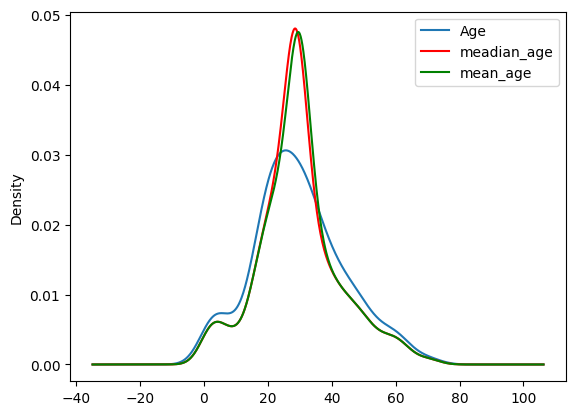

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
xtrain['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
xtrain['meadian_age'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
xtrain['mean_age'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

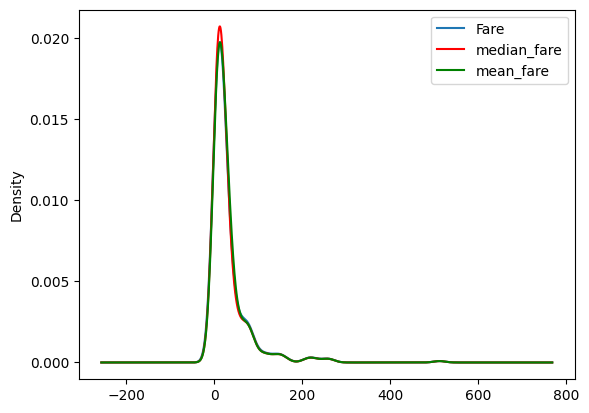

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
xtrain['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
xtrain['median_fare'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
xtrain['mean_fare'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [16]:

xtrain.corr()

,Age,Fare,Family,mean_age,meadian_age,mean_fare,median_fare
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
mean_age,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
meadian_age,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
mean_fare,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
median_fare,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


<Axes: >

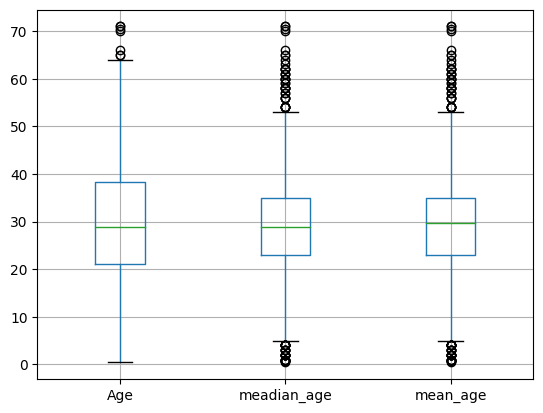

In [18]:
xtrain[['Age', 'meadian_age', 'mean_age']].boxplot()

<Axes: >

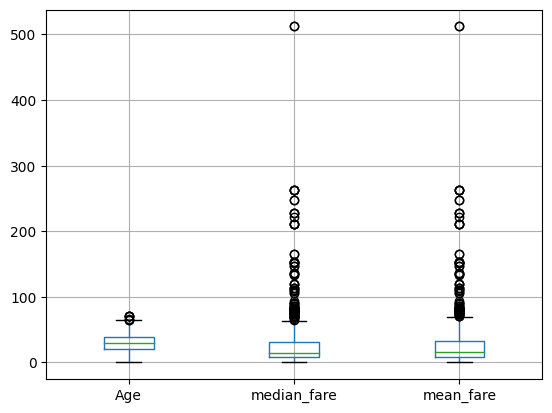

In [19]:
xtrain[['Age', 'median_fare', 'mean_fare']].boxplot()

using Sklearn

In [22]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [23]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [24]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [25]:
trf.fit(X_train)

c:\Python311\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [26]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [27]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [29]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [30]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])